# Preppin' Data
## 2024: Week 6 - Staff Income Tax
**Created by:** Carl Allchin | [Challenge Link](https://preppindata.blogspot.com/2024/02/2024-week-6-staff-income-tax.html)

The end of January in the UK (where Prep Air is based) is when residents have to submit their income tax returns by. <br>
To help our team, we've offered to summarise their tax position for them. The UK income tax works by bands. <br>
Here's a summary table showing the percentage of tax for each pound earned in that bracket: <br><br>

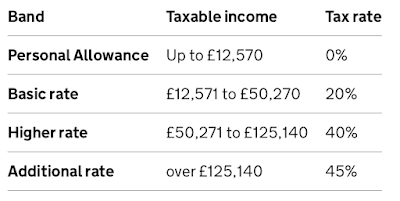<br>

For example, if I earned £12,571. I would pay £0.20 of tax in total: £0 for the first £12,570 earned and then 20% of the £1 in the next tax band. 

In [1]:
# Input the csv file, Add a row number to the data set
# If any team member has a change in their pay, their new salary is recorded as a later record but the input contains their former record based on what they would have been paid

import pandas as pd
salaries = pd.read_csv("PD 2024 Wk 6 Input.csv")
salaries

,StaffID,1,2,3,4,5,6,7,8,9,10,11,12
0,1533,2398.0,2421.98,2446.20,2446.20,2495.12,2495.12,2495.12,2495.12,2545.03,2621.38,2621.38,2621.38
1,1339,7304.0,7523.12,7673.58,7673.58,7750.32,7827.82,8062.66,8304.54,8470.63,8555.33,8555.33,8726.44
2,2291,8240.0,8404.80,8572.90,8744.35,8831.80,9096.75,9278.69,9464.26,9464.26,9464.26,9558.90,9558.90
3,2038,3908.0,3986.16,3986.16,4026.02,4066.28,4188.27,4313.92,4443.34,4487.77,4622.40,4668.63,4715.31
4,2810,3988.0,4107.64,4148.72,4190.20,4274.01,4316.75,4316.75,4359.92,4490.71,4535.62,4671.69,4718.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2959,9163.0,9163.00,9163.00,9163.00,9437.89,9626.65,9915.45,10014.60,10014.60,10014.60,10214.89,10521.34
995,1467,1928.0,1985.84,2045.42,2086.32,2128.05,2170.61,2235.73,2258.09,2303.25,2372.35,2396.07,2443.99
996,2582,5343.0,5449.86,5558.86,5614.45,5726.73,5898.54,6016.51,6197.00,6320.94,6320.94,6320.94,6320.94
997,1779,11138.0,11472.14,11816.30,11816.30,11934.47,12173.16,12538.35,12789.12,13172.79,13304.52,13304.52,13570.61


In [2]:
# Find each team member's annual salary

salaries["Salary"] = salaries.iloc[:, 1:13].sum(axis=1)
salaries = salaries.drop(columns=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])
salaries

,StaffID,Salary
0,1533,30102.03
1,1339,96427.35
2,2291,108679.87
3,2038,51412.26
4,2810,52118.42
...,...,...
994,2959,116412.02
995,1467,26353.72
996,2582,71088.71
997,1779,149030.28


In [3]:
# Find each team member's maximum tax band based on their annual salary

def max_tax(pound):
    if pound <= 12570:
        return "0% rate"
    elif 12571 <= pound <= 50270:
        return "20% rate"
    elif 50271 <= pound <= 125140:
        return "40% rate"
    else:
        return "45% rate"

salaries["Max Tax Rate"] = salaries["Salary"].apply(max_tax)
salaries

,StaffID,Salary,Max Tax Rate
0,1533,30102.03,20% rate
1,1339,96427.35,40% rate
2,2291,108679.87,40% rate
3,2038,51412.26,40% rate
4,2810,52118.42,40% rate
...,...,...,...
994,2959,116412.02,40% rate
995,1467,26353.72,20% rate
996,2582,71088.71,40% rate
997,1779,149030.28,45% rate


In [4]:
salaries["Max Tax Rate"].unique()

array(['20% rate', '40% rate', '45% rate'], dtype=object)

In [5]:
# Work out how much tax an individual paid for each of the % bands. 
# 20% tax rate paid

def twenty_tax(row):
    if row["Max Tax Rate"] == "20% rate":
        return (row["Salary"] - 12570) * 0.2
    else:
        return ((50270 - 12570) * 0.2)

salaries["20% rate tax paid"] = salaries.apply(twenty_tax, axis=1)
salaries

,StaffID,Salary,Max Tax Rate,20% rate tax paid
0,1533,30102.03,20% rate,3506.406
1,1339,96427.35,40% rate,7540.000
2,2291,108679.87,40% rate,7540.000
3,2038,51412.26,40% rate,7540.000
4,2810,52118.42,40% rate,7540.000
...,...,...,...,...
994,2959,116412.02,40% rate,7540.000
995,1467,26353.72,20% rate,2756.744
996,2582,71088.71,40% rate,7540.000
997,1779,149030.28,45% rate,7540.000


In [6]:
# 40% tax rate paid

def fourty_tax(row):
    if row["Max Tax Rate"] == "40% rate":
        return (row["Salary"] - 50270) * 0.4
    elif row["Max Tax Rate"] == "45% rate":
        return ((125140 - 50270) * 0.4)

salaries["40% rate tax paid"] = salaries.apply(fourty_tax, axis=1)
salaries

,StaffID,Salary,Max Tax Rate,20% rate tax paid,40% rate tax paid
0,1533,30102.03,20% rate,3506.406,NaN
1,1339,96427.35,40% rate,7540.000,18462.940
2,2291,108679.87,40% rate,7540.000,23363.948
3,2038,51412.26,40% rate,7540.000,456.904
4,2810,52118.42,40% rate,7540.000,739.368
...,...,...,...,...,...
994,2959,116412.02,40% rate,7540.000,26456.808
995,1467,26353.72,20% rate,2756.744,NaN
996,2582,71088.71,40% rate,7540.000,8327.484
997,1779,149030.28,45% rate,7540.000,29948.000


In [7]:
# 45% tax rate paid

def fourtyfive_tax(row):
    if row["Max Tax Rate"] == "45% rate":
        return (row["Salary"] - 125140) * 0.45

salaries["45% rate tax paid"] = salaries.apply(fourtyfive_tax, axis=1)
salaries

,StaffID,Salary,Max Tax Rate,20% rate tax paid,40% rate tax paid,45% rate tax paid
0,1533,30102.03,20% rate,3506.406,NaN,NaN
1,1339,96427.35,40% rate,7540.000,18462.940,NaN
2,2291,108679.87,40% rate,7540.000,23363.948,NaN
3,2038,51412.26,40% rate,7540.000,456.904,NaN
4,2810,52118.42,40% rate,7540.000,739.368,NaN
...,...,...,...,...,...,...
994,2959,116412.02,40% rate,7540.000,26456.808,NaN
995,1467,26353.72,20% rate,2756.744,NaN,NaN
996,2582,71088.71,40% rate,7540.000,8327.484,NaN
997,1779,149030.28,45% rate,7540.000,29948.000,10750.626


In [8]:
# Total the tax paid across all three % bands. Call this field 'Total Tax Paid' 

tax_columns = ["20% rate tax paid", "40% rate tax paid", "45% rate tax paid"]
salaries["Total Tax Paid"] = salaries[tax_columns].sum(axis=1)
output = salaries

## Output
Note: your output may have some rounding differences and that's ok as it will depend on the tool you use<br>

**7 data fields: **
- StaffID 
- Salary
- Max Tax Rate
- Total Tax Paid
- 20% rate tax paid
- 40% tax rate paid
- 45% tax rate paid

In [9]:
# Output the data
output

,StaffID,Salary,Max Tax Rate,20% rate tax paid,40% rate tax paid,45% rate tax paid,Total Tax Paid
0,1533,30102.03,20% rate,3506.406,NaN,NaN,3506.406
1,1339,96427.35,40% rate,7540.000,18462.940,NaN,26002.940
2,2291,108679.87,40% rate,7540.000,23363.948,NaN,30903.948
3,2038,51412.26,40% rate,7540.000,456.904,NaN,7996.904
4,2810,52118.42,40% rate,7540.000,739.368,NaN,8279.368
...,...,...,...,...,...,...,...
994,2959,116412.02,40% rate,7540.000,26456.808,NaN,33996.808
995,1467,26353.72,20% rate,2756.744,NaN,NaN,2756.744
996,2582,71088.71,40% rate,7540.000,8327.484,NaN,15867.484
997,1779,149030.28,45% rate,7540.000,29948.000,10750.626,48238.626


In [10]:
# Generating csv output file
output.to_csv("output-202406.csv", index=False)